In [58]:
import os, shutil
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [59]:
original_dataset_dir = '/home/ly/Downloads/dogs-vs-cats/train'

In [60]:
base_dir = '/home/ly/Downloads/dogs-vs-cats_small'

In [61]:
os.mkdir(base_dir)

FileExistsError: [Errno 17] File exists: '/home/ly/Downloads/dogs-vs-cats_small'

In [ ]:
train_dir = os.path.join(base_dir, 'train')

In [ ]:
os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
os.mkdir(validation_dir)

In [ ]:
test_dir = os.path.join(base_dir, 'test')

In [ ]:
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')

In [ ]:
os.mkdir(train_cats_dir)

In [ ]:
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [ ]:
os.mkdir(train_dogs_dir)

In [62]:
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [63]:
os.mkdir(validation_cats_dir)

FileExistsError: [Errno 17] File exists: '/home/ly/Downloads/dogs-vs-cats_small/validation/cats'

In [ ]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
os.mkdir(validation_dogs_dir)

In [ ]:
test_cats_dir = os.path.join(test_dir, 'cats')

In [ ]:
os.mkdir(test_cats_dir)

In [ ]:
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [ ]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]

In [ ]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

In [ ]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

In [ ]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [64]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

In [65]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [66]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]

In [67]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [68]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [69]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [70]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [71]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [72]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [73]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [74]:
from keras import layers
from keras import models

In [75]:
model = models.Sequential()

In [76]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [78]:
from keras import optimizers

In [79]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['accuracy'])

In [80]:
from keras.preprocessing.image import ImageDataGenerator

In [81]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [82]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [83]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [84]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [85]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [86]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6889 - accuracy: 0.5150 - val_loss: 0.6631 - val_accuracy: 0.5710
Epoch 2/30
100/100 [==============================] - 15s 150ms/step - loss: 0.6497 - accuracy: 0.6125 - val_loss: 0.6507 - val_accuracy: 0.6090
Epoch 3/30
100/100 [==============================] - 15s 146ms/step - loss: 0.5932 - accuracy: 0.6800 - val_loss: 0.6625 - val_accuracy: 0.6050
Epoch 4/30
100/100 [==============================] - 14s 140ms/step - loss: 0.5625 - accuracy: 0.7060 - val_loss: 0.6105 - val_accuracy: 0.6500
Epoch 5/30
100/100 [==============================] - 15s 148ms/step - loss: 0.5380 - accuracy: 0.7270 - val_loss: 0.6138 - val_accuracy: 0.6640
Epoch 6/30
100/100 [==============================] - 12s 124ms/step - loss: 0.5094 - accuracy: 0.7475 - val_loss: 0.5463 - val_accuracy: 0.6990
Epoch 7/30
100/100 [==============================] - 

In [87]:
model.save('cats_and_dogs_small_1.h5')

In [88]:
import matplotlib.pyplot as plt

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [90]:
epochs = range(1, len(acc)+1)

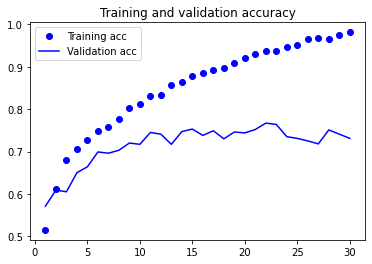

In [91]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

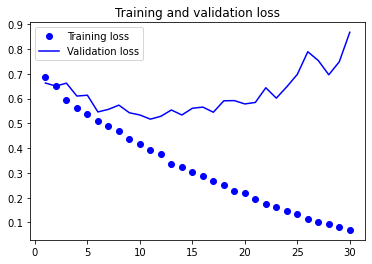

In [92]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [101]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [93]:
from keras.preprocessing import image

In [94]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [95]:
img_path = fnames[3]

In [111]:
img = image.load_img(img_path, target_size=(150,150))
type(img)

PIL.Image.Image

In [97]:
x = image.img_to_array(img)

In [98]:
x = x.reshape((1,) + x.shape)

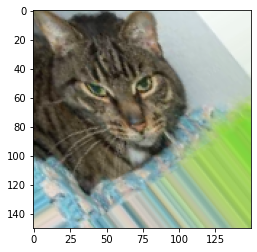

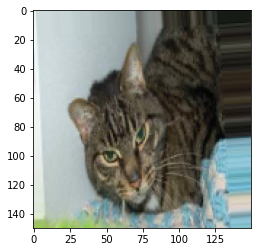

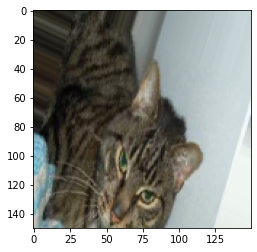

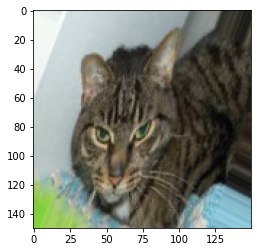

In [102]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [103]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [104]:
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

In [105]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [106]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [109]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [108]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [110]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 42s 425ms/step - loss: 0.6890 - accuracy: 0.5424 - val_loss: 0.6732 - val_accuracy: 0.5825
Epoch 2/100
100/100 [==============================] - 45s 449ms/step - loss: 0.6805 - accuracy: 0.5533 - val_loss: 0.6676 - val_accuracy: 0.5941
Epoch 3/100
100/100 [==============================] - 45s 451ms/step - loss: 0.6612 - accuracy: 0.6074 - val_loss: 0.6353 - val_accuracy: 0.6352
Epoch 4/100
100/100 [==============================] - 43s 434ms/step - loss: 0.6458 - accuracy: 0.6231 - val_loss: 0.6178 - val_accuracy: 0.6534
Epoch 5/100
100/100 [==============================] - 44s 440ms/step - loss: 0.6361 - accuracy: 0.6269 - val_loss: 0.6829 - val_accuracy: 0.5888
Epoch 6/100
100/100 [==============================] - 45s 448ms/step - loss: 0.6180 - accuracy: 0.6540 - val_loss: 0.6290 - val_accuracy: 0.6327
Epoch 7/100
100/100 [==============================] - 44s 442ms/step - loss: 0.6116 - accuracy: 0.6632 - val_loss: 0.5985 -

Epoch 57/100
100/100 [==============================] - 42s 417ms/step - loss: 0.4161 - accuracy: 0.8090 - val_loss: 0.4474 - val_accuracy: 0.7900
Epoch 58/100
100/100 [==============================] - 44s 443ms/step - loss: 0.4183 - accuracy: 0.8052 - val_loss: 0.4334 - val_accuracy: 0.7983
Epoch 59/100
100/100 [==============================] - 45s 448ms/step - loss: 0.3956 - accuracy: 0.8144 - val_loss: 0.4640 - val_accuracy: 0.7854
Epoch 60/100
100/100 [==============================] - 42s 425ms/step - loss: 0.4009 - accuracy: 0.8188 - val_loss: 0.4136 - val_accuracy: 0.8020
Epoch 61/100
100/100 [==============================] - 43s 426ms/step - loss: 0.4055 - accuracy: 0.8072 - val_loss: 0.6069 - val_accuracy: 0.7210
Epoch 62/100
100/100 [==============================] - 42s 419ms/step - loss: 0.4121 - accuracy: 0.8097 - val_loss: 0.4689 - val_accuracy: 0.7912
Epoch 63/100
100/100 [==============================] - 41s 411ms/step - loss: 0.4073 - accuracy: 0.8100 - val_loss: 0

In [112]:
model.save('cats_and_dogs_small_2.h5')

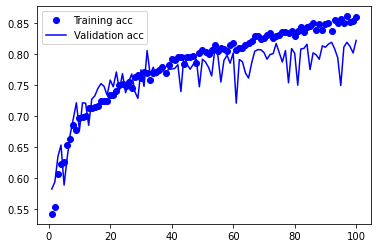

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

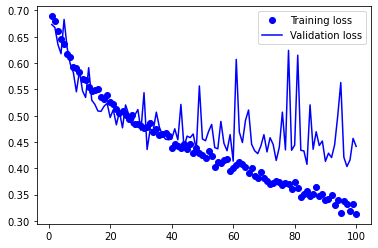

In [115]:
plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

In [116]:
from keras.applications import VGG16

In [118]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 6s 0us/step


In [119]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [120]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [121]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [122]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150,150),
        batch_size = batch_size,
        class_mode = 'binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [123]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.


In [124]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 1000 images belonging to 2 classes.


In [125]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.


In [126]:
train_features.shape

(2000, 4, 4, 512)

In [127]:
train_labels.shape

(2000,)

In [128]:
train_features = np.reshape(train_features, (2000, -1))
validation_features = np.reshape(validation_features, (1000,-1))
test_features = np.reshape(test_features, (1000,-1))

In [130]:
model = models.Sequential()
model.add(layers.Dense(256,activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [131]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [132]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 14ms/step - loss: 0.5961 - accuracy: 0.6880 - val_loss: 0.4704 - val_accuracy: 0.7830
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 0.4261 - accuracy: 0.8120 - val_loss: 0.3796 - val_accuracy: 0.8350
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3594 - accuracy: 0.8445 - val_loss: 0.3261 - val_accuracy: 0.8710
Epoch 4/30
100/100 [==============================] - 1s 14ms/step - loss: 0.3139 - accuracy: 0.8690 - val_loss: 0.2997 - val_accuracy: 0.8830
Epoch 5/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2906 - accuracy: 0.8880 - val_loss: 0.2858 - val_accuracy: 0.8870
Epoch 6/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2636 - accuracy: 0.8935 - val_loss: 0.2738 - val_accuracy: 0.8930
Epoch 7/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2485 - accuracy: 0.9080 - val_loss: 0.2677 - val_accuracy: 0.8910

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

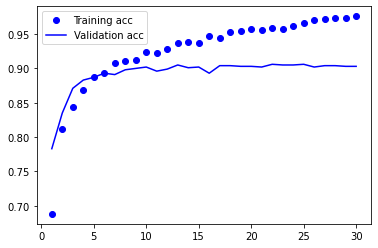

In [134]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

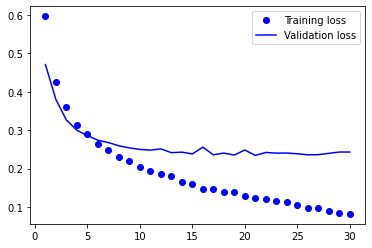

In [135]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

In [136]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [137]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [138]:
print('This is the number of trainable weights before freezing the conv base:', 
     len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [139]:
conv_base.trainable = False

In [140]:
print('This is the number of trainable weights after freezing the conv base:', 
     len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [141]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [142]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [143]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [144]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [146]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [147]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 31s 305ms/step - loss: 0.5961 - accuracy: 0.6715 - val_loss: 0.4607 - val_accuracy: 0.8000
Epoch 2/30
100/100 [==============================] - 26s 261ms/step - loss: 0.4902 - accuracy: 0.7850 - val_loss: 0.3938 - val_accuracy: 0.8400
Epoch 3/30
100/100 [==============================] - 30s 304ms/step - loss: 0.4388 - accuracy: 0.8075 - val_loss: 0.3310 - val_accuracy: 0.8680
Epoch 4/30
100/100 [==============================] - 27s 271ms/step - loss: 0.3968 - accuracy: 0.8300 - val_loss: 0.3064 - val_accuracy: 0.8740
Epoch 5/30
100/100 [==============================] - 30s 305ms/step - loss: 0.3815 - accuracy: 0.8380 - val_loss: 0.2990 - val_accuracy: 0.8770
Epoch 6/30
100/100 [==============================] - 27s 270ms/step - loss: 0.3641 - accuracy: 0.8400 - val_loss: 0.2923 - val_accuracy: 0.8700
Epoch 7/30
100/100 [==============================] - 29s 288ms/step - loss: 0.3571 - accuracy: 0.8435 - val_loss: 0.2702 - val_ac

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

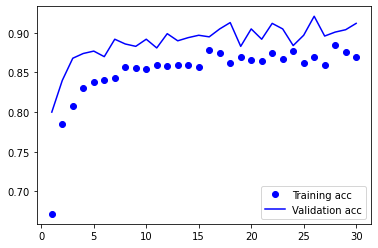

In [149]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

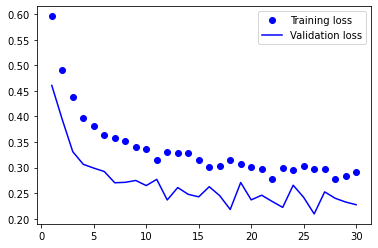

In [150]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

In [151]:
model.save('cats_and_dogs_small_3.h5')

In [153]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [154]:
conv_base.trainable = True
set_trainable= False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [155]:
print(len(model.trainable_weights))

10


In [156]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['accuracy'])

In [157]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 29s 287ms/step - loss: 0.2993 - accuracy: 0.8625 - val_loss: 0.2372 - val_accuracy: 0.9060
Epoch 2/100
100/100 [==============================] - 27s 270ms/step - loss: 0.2488 - accuracy: 0.9010 - val_loss: 0.2178 - val_accuracy: 0.9120
Epoch 3/100
100/100 [==============================] - 30s 303ms/step - loss: 0.2333 - accuracy: 0.9010 - val_loss: 0.2177 - val_accuracy: 0.9140
Epoch 4/100
100/100 [==============================] - 28s 276ms/step - loss: 0.2293 - accuracy: 0.9030 - val_loss: 0.2162 - val_accuracy: 0.9140
Epoch 5/100
100/100 [==============================] - 30s 303ms/step - loss: 0.1995 - accuracy: 0.9160 - val_loss: 0.1891 - val_accuracy: 0.9260
Epoch 6/100
100/100 [==============================] - 28s 283ms/step - loss: 0.1942 - accuracy: 0.9195 - val_loss: 0.2987 - val_accuracy: 0.8870
Epoch 7/100
100/100 [==============================] - 29s 292ms/step - loss: 0.1861 - accuracy: 0.9205 - val_loss: 0.2145 -

Epoch 57/100
100/100 [==============================] - 27s 274ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.2389 - val_accuracy: 0.9330
Epoch 58/100
100/100 [==============================] - 30s 298ms/step - loss: 0.0337 - accuracy: 0.9885 - val_loss: 0.2321 - val_accuracy: 0.9400
Epoch 59/100
100/100 [==============================] - 27s 268ms/step - loss: 0.0315 - accuracy: 0.9880 - val_loss: 0.2907 - val_accuracy: 0.9330
Epoch 60/100
100/100 [==============================] - 30s 297ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.2906 - val_accuracy: 0.9290
Epoch 61/100
100/100 [==============================] - 27s 271ms/step - loss: 0.0427 - accuracy: 0.9840 - val_loss: 0.2255 - val_accuracy: 0.9330
Epoch 62/100
100/100 [==============================] - 30s 295ms/step - loss: 0.0309 - accuracy: 0.9870 - val_loss: 0.2457 - val_accuracy: 0.9370
Epoch 63/100
100/100 [==============================] - 27s 273ms/step - loss: 0.0364 - accuracy: 0.9905 - val_loss: 0

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

In [162]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

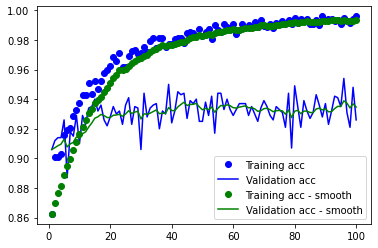

In [165]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, smooth_curve(acc), 'go', label='Training acc - smooth')
plt.plot(epochs, smooth_curve(val_acc), 'g', label='Validation acc - smooth')
plt.legend()

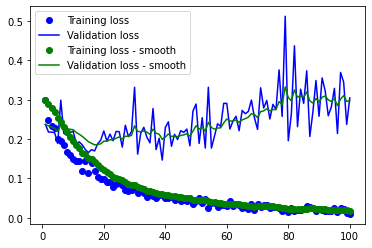

In [164]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, smooth_curve(loss), 'go', label='Training loss - smooth')
plt.plot(epochs, smooth_curve(val_loss), 'g', label='Validation loss - smooth')
plt.legend()

In [166]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [167]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [168]:
print('test acc:', test_acc)

test acc: 0.9380000233650208
